<a href="https://colab.research.google.com/github/hasuarez32/Lab1-Opti/blob/main/Lab1_Opti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#	1. Escoge un problema de optimización de dos variables (o puedes crear uno también). Plantea su función de costo y las restricciones. Grafica la región factible con ayuda de Python. Desarrolla un programa que le permita al usuario:
# a.	tener el valor de la función de costo a partir de un punto (x,y)
# b.	ver gráficamente cómo cambia la región factible ante un cambio en las restricciones.


Ingrese el valor de x (Producto X): 2
Ingrese el valor de y (Producto Y): 3
Ingrese el valor de la restricción de tiempo T: 10
Ingrese el valor de la restricción de materiales M: 20
El valor de la función de costo Z(x, y) = 50x + 80y en el punto (2.0, 3.0) es: $340.0


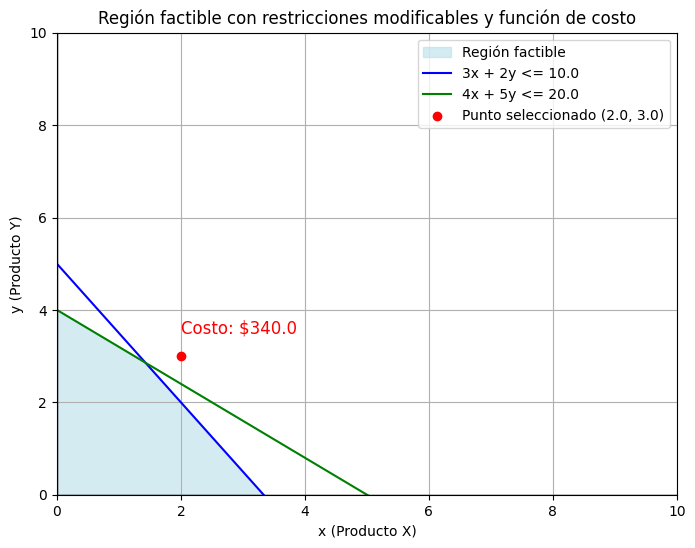

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_feasible_region(T, M, x_val, y_val, cost_value):
    x = np.linspace(0, 10, 400)
    y1 = (T - 3*x) / 2
    y2 = (M - 4*x) / 5

    plt.figure(figsize=(8, 6))


    plt.fill_between(x, np.minimum(y1, y2), 0, where=(y1 > 0) & (y2 > 0), color='lightblue', alpha=0.5, label='Región factible')


    plt.plot(x, y1, label=f'3x + 2y <= {T}', color='blue')
    plt.plot(x, y2, label=f'4x + 5y <= {M}', color='green')


    plt.xlim(0, 10)
    plt.ylim(0, 10)


    plt.scatter(x_val, y_val, color='red', zorder=5, label=f'Punto seleccionado ({x_val}, {y_val})')


    plt.text(x_val, y_val + 0.5, f'Costo: ${cost_value}', color='red', fontsize=12)

    # Etiquetas
    plt.xlabel('x (Producto X)')
    plt.ylabel('y (Producto Y)')
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.legend()
    plt.title('Región factible con restricciones modificables y función de costo')
    plt.grid(True)
    plt.show()


def calculate_cost(x, y):
    return 50 * x + 80 * y

def main():

    try:
        x_val = float(input("Ingrese el valor de x (Producto X): "))
        y_val = float(input("Ingrese el valor de y (Producto Y): "))
        T = float(input("Ingrese el valor de la restricción de tiempo T: "))
        M = float(input("Ingrese el valor de la restricción de materiales M: "))
    except ValueError:
        print("Por favor, ingrese valores numéricos válidos.")
        return


    cost_value = calculate_cost(x_val, y_val)
    print(f"El valor de la función de costo Z(x, y) = 50x + 80y en el punto ({x_val}, {y_val}) es: ${cost_value}")


    plot_feasible_region(T, M, x_val, y_val, cost_value)


if __name__ == "__main__":
    main()

# 2 **Selecciona un método de representación de matrices sparse e impleméntalo en Python desde cero. Compara tus resultados con la función de las librerías de Python.**

In [ ]:
import numpy as np
import time
from scipy.sparse import coo_matrix


class SparseMatrixCOO:
    def __init__(self):
        self.rows = []
        self.cols = []
        self.data = []

    def add_element(self, row, col, value):
        """Agrega un elemento a la matriz en formato COO"""
        if value != 0:
            self.rows.append(row)
            self.cols.append(col)
            self.data.append(value)

    def display(self):
        """Muestra la matriz dispersa en formato COO"""
        print("Fila:   ", self.rows)
        print("Columna:", self.cols)
        print("Valores:", self.data)

    def to_dense(self, shape):
        """Convierte la matriz dispersa en una matriz densa (completa)"""
        dense_matrix = [[0 for _ in range(shape[1])] for _ in range(shape[0])]
        for r, c, v in zip(self.rows, self.cols, self.data):
            dense_matrix[r][c] = v
        return dense_matrix

    def multiply_vector(self, vector):
        """Multiplica la matriz dispersa con un vector"""
        result = [0] * len(vector)
        for r, c, v in zip(self.rows, self.cols, self.data):
            result[r] += v * vector[c]
        return result

    def multiply_matrix(self, other, shape):
        """Multiplica la matriz dispersa por otra matriz"""
        result = [[0 for _ in range(shape[1])] for _ in range(shape[0])]
        for r, c, v in zip(self.rows, self.cols, self.data):
            for k in range(shape[1]):
                result[r][k] += v * other[c][k]
        return result

def time_function(func, *args):
    start_time = time.time()
    result = func(*args)
    elapsed_time = time.time() - start_time
    return result, elapsed_time

def compare_sparse_operations():

    rows = np.array([0, 1, 2])
    cols = np.array([2, 1, 0])
    data = np.array([3, 4, 5])
    vector = np.array([1, 2, 3])
    matrix = [[0, 0, 3], [0, 4, 0], [5, 0, 0]]

    shape = (3, 3)


    sparse_matrix = SparseMatrixCOO()
    for r, c, v in zip(rows, cols, data):
        sparse_matrix.add_element(r, c, v)

    print("\n=== Implementación desde cero ===")
    sparse_matrix.display()


    result_vector_zero, time_zero_vec = time_function(sparse_matrix.multiply_vector, vector)
    print("\nMultiplicación por vector (implementación desde cero):", result_vector_zero)
    print(f"Tiempo de ejecución (vector): {time_zero_vec:.8f} segundos")


    result_matrix_zero, time_zero_mat = time_function(sparse_matrix.multiply_matrix, matrix, shape)
    print("\nMultiplicación por matriz (implementación desde cero):")
    for row in result_matrix_zero:
        print(row)
    print(f"Tiempo de ejecución (matriz): {time_zero_mat:.8f} segundos")


    sparse_matrix_scipy = coo_matrix((data, (rows, cols)), shape=(3, 3))

    print("\n=== Implementación con scipy.sparse ===")
    print("Fila:", sparse_matrix_scipy.row)
    print("Columna:", sparse_matrix_scipy.col)
    print("Valores:", sparse_matrix_scipy.data)


    result_vector_scipy, time_scipy_vec = time_function(sparse_matrix_scipy.dot, vector)
    print("\nMultiplicación por vector (scipy.sparse):", result_vector_scipy)
    print(f"Tiempo de ejecución (vector): {time_scipy_vec:.8f} segundos")


    result_matrix_scipy, time_scipy_mat = time_function(sparse_matrix_scipy.dot, matrix)
    print("\nMultiplicación por matriz (scipy.sparse):")
    print(result_matrix_scipy)
    print(f"Tiempo de ejecución (matriz): {time_scipy_mat:.8f} segundos")


compare_sparse_operations()



=== Implementación desde cero ===
Fila:    [0, 1, 2]
Columna: [2, 1, 0]
Valores: [3, 4, 5]

Multiplicación por vector (implementación desde cero): [9, 8, 5]
Tiempo de ejecución (vector): 0.00001431 segundos

Multiplicación por matriz (implementación desde cero):
[15, 0, 0]
[0, 16, 0]
[0, 0, 15]
Tiempo de ejecución (matriz): 0.00001526 segundos

=== Implementación con scipy.sparse ===
Fila: [0 1 2]
Columna: [2 1 0]
Valores: [3 4 5]

Multiplicación por vector (scipy.sparse): [9 8 5]
Tiempo de ejecución (vector): 0.00019622 segundos

Multiplicación por matriz (scipy.sparse):
[[15  0  0]
 [ 0 16  0]
 [ 0  0 15]]
Tiempo de ejecución (matriz): 0.00010014 segundos


#3.	Crea un programa para implementar la expansión en series de Taylor. El usuario debe ingresar la cantidad de términos de la expansión, el punto de expansión y la función a representar (debe tener al menos 5 funciones diferentes para escoger). Se debe mostrar en una gráfica la función original y la aproximación.

Elige una de las siguientes funciones:
1: sin(Symbol('x'))
2: cos(Symbol('x'))
3: exp(Symbol('x'))
4: log(Add(Symbol('x'), Integer(1)))
5: Pow(Symbol('x'), Integer(2))
Introduce el número de la función que deseas aproximar: 5
Introduce el número de términos de la serie de Taylor: 8
Introduce el punto de expansión (ejemplo: 0): 3

Función Original: x**2
Serie de Taylor: 6.0*x + 9.0*(0.333333333333333*x - 1)**2 - 9.0
Introduce el valor mínimo de x para la gráfica: 2
Introduce el valor máximo de x para la gráfica: 3


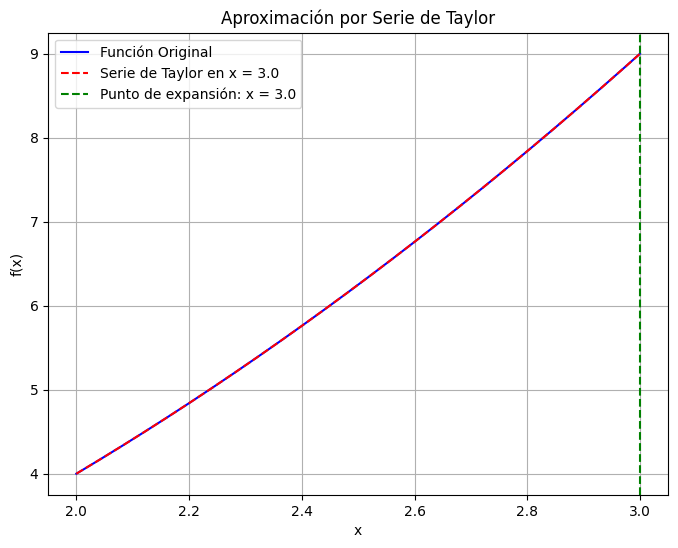

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones disponibles a elegir
def define_functions():
    x = sp.symbols('x')
    return {
        '1': sp.sin(x),
        '2': sp.cos(x),
        '3': sp.exp(x),
        '4': sp.log(1 + x),  # logaritmo natural
        '5': x**2
    }


def taylor_series(func, x, point, order):
    return sp.series(func, x, point, order).removeO()


def sympy_to_numpy(expr, var):
    return sp.lambdify(var, expr, "numpy")

def plot_taylor(func_original, func_taylor, point, x_range):
    # Definir los puntos en el rango de x
    x_vals = np.linspace(x_range[0], x_range[1], 400)

    # Evaluar las funciones en el rango de x
    y_original = func_original(x_vals)
    y_taylor = func_taylor(x_vals)

    # Crear la gráfica
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_original, label="Función Original", color="blue")
    plt.plot(x_vals, y_taylor, label=f"Serie de Taylor en x = {point}", color="red", linestyle='--')
    plt.axvline(x=point, color="green", linestyle="--", label=f"Punto de expansión: x = {point}")

    # Configurar etiquetas y leyendas
    plt.title("Aproximación por Serie de Taylor")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Función principal
def main():
    # Definir la variable simbólica
    x = sp.symbols('x')


    functions = define_functions()
    print("Elige una de las siguientes funciones:")
    for key, func in functions.items():
        print(f"{key}: {sp.srepr(func)}")

    choice = input("Introduce el número de la función que deseas aproximar: ")
    if choice not in functions:
        print("Opción no válida")
        return

    order = int(input("Introduce el número de términos de la serie de Taylor: "))
    point = float(input("Introduce el punto de expansión (ejemplo: 0): "))


    func = functions[choice]
    taylor_approx = taylor_series(func, x, point, order)


    func_original = sympy_to_numpy(func, x)
    func_taylor = sympy_to_numpy(taylor_approx, x)

    # Mostrar la función original y la serie de Taylor
    print(f"\nFunción Original: {func}")
    print(f"Serie de Taylor: {taylor_approx}")

    # Solicitar el rango para graficar
    x_min = float(input("Introduce el valor mínimo de x para la gráfica: "))
    x_max = float(input("Introduce el valor máximo de x para la gráfica: "))

    # Verificar que el rango no cause errores en las funciones
    if choice == '4' and x_min <= -1:  # log(1 + x) no está definido para x <= -1
        print("Error: log(1 + x) no está definido para x <= -1. Elige otro rango.")
        return

    # Graficar la función original y la aproximación de Taylor
    plot_taylor(func_original, func_taylor, point, (x_min, x_max))

if __name__ == "__main__":
    main()


#4.	Escoge 3 algoritmos de optimización sin restricciones. Realiza cambios sobre sus parámetros y sobre el punto inicial. ¿Cómo afectan estos cambios los resultados? ¿Cómo afecta el tiempo de convergencia o cantidad de iteraciones? Nota: Puedes utilizar las librerías de Python y alguna ayuda gráfica o tabulaciones si lo necesitan para soportar sus conclusiones.

Solución encontrada: 2.0000004593802365, Iteraciones: 80


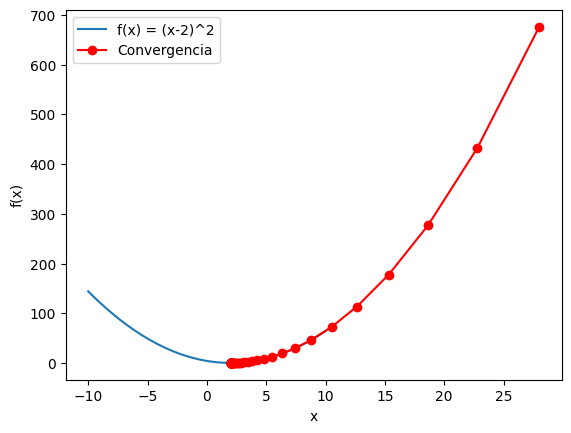

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, grad_f, x0, learning_rate=0.1, tolerance=1e-6, max_iter=1000):
    x = x0
    iter_count = 0
    history = [x0]

    while np.linalg.norm(grad_f(x)) > tolerance and iter_count < max_iter:
        x = x - learning_rate * grad_f(x)
        history.append(x)
        iter_count += 1

    return x, iter_count, history

# Función objetivo: f(x) = (x-2)^2
def f(x):
    return (x - 2)**2

# Gradiente de f(x)
def grad_f(x):
    return 2 * (x - 2)

# Parámetros
x0 = 28  # Punto inicial
learning_rate = 0.1


solution, iterations, history = gradient_descent(f, grad_f, x0, learning_rate)


print(f"Solución encontrada: {solution}, Iteraciones: {iterations}")

x_vals = np.linspace(-10, 10, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label="f(x) = (x-2)^2")
history_x = [h for h in history]
history_y = [f(h) for h in history]
plt.plot(history_x, history_y, marker="o", color="red", label="Convergencia")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


Solución encontrada: [2.], Iteraciones: 1


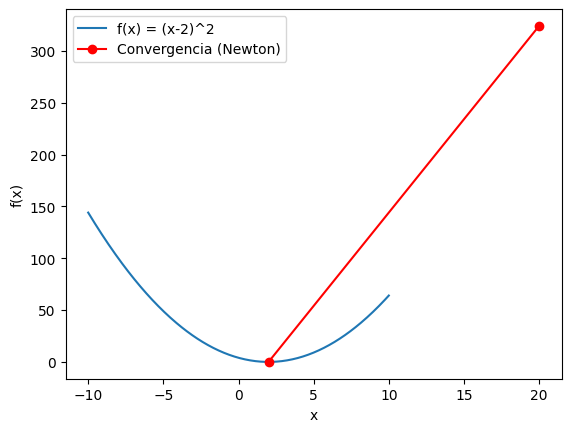

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newton_method(f, grad_f, hessian_f, x0, tolerance=1e-6, max_iter=1000):
    x = np.array(x0)
    iter_count = 0
    history = [x0]

    while np.linalg.norm(grad_f(x)) > tolerance and iter_count < max_iter:
        hessian_inv = np.linalg.inv(hessian_f(x))
        x = x - hessian_inv.dot(grad_f(x))
        history.append(x.copy())
        iter_count += 1

    return x, iter_count, history

# Función objetivo f(x) = (x-2)^2
def f(x):
    return (x - 2)**2


def grad_f(x):
    return 2 * (x - 2)


def hessian_f(x):
    return np.array([[2]])

x0 = np.array([20])
x_vals = np.linspace(-10, 10, 400)
y_vals = f(x_vals)


solution, iterations, history = newton_method(f, grad_f, hessian_f, x0)


print(f"Solución encontrada: {solution}, Iteraciones: {iterations}")


plt.plot(x_vals, y_vals, label="f(x) = (x-2)^2")

history_x = [h[0] for h in history]
history_y = [f(h[0]) for h in history]
plt.plot(history_x, history_y, marker="o", color="red", label="Convergencia (Newton)")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()



Solución encontrada: [2.], Iteraciones: 27


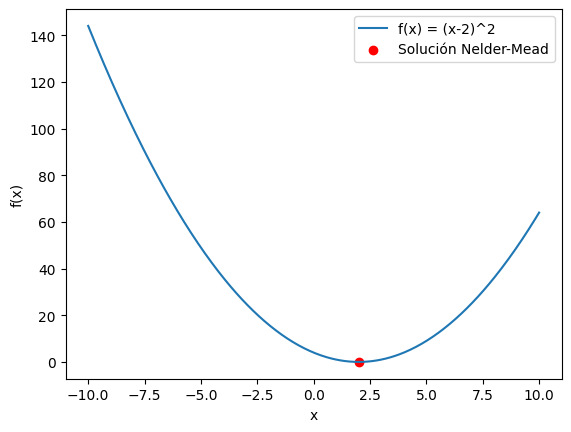

In [ ]:
from scipy.optimize import minimize


result = minimize(f, x0, method='Nelder-Mead', tol=1e-6)


print(f"Solución encontrada: {result.x}, Iteraciones: {result.nit}")

plt.plot(x_vals, y_vals, label="f(x) = (x-2)^2")
plt.scatter(result.x, f(result.x), color="red", label="Solución Nelder-Mead")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


1. Punto inicial:
Gradiente Descendente: Si el punto inicial $X0$ está muy lejos del mínimo, el algoritmo tarda más en converger. Esto se puede mitigar ajustando la tasa de aprendizaje.
Newton: El punto inicial no afecta tanto la convergencia si estamos cerca del mínimo, ya que este método utiliza información de segundo orden (la Hessiana).
Nelder-Mead: Este método es bastante robusto al punto inicial, pero su convergencia puede ser lenta en espacios de alta dimensionalidad.
2. Tasa de aprendizaje (Gradiente Descendente):
Pequeña tasa de aprendizaje: Converge más lentamente y puede necesitar más iteraciones.
Alta tasa de aprendizaje: Si es demasiado alta, el algoritmo puede "rebotar" alrededor del mínimo y no converger correctamente.
3. Convergencia y tiempo de ejecución:
Gradiente Descendente: Necesita más iteraciones para converger, especialmente con funciones más complejas o tasas de aprendizaje pequeñas.
Newton: Converge rápidamente, pero el cálculo de la Hessiana puede ser costoso en términos de tiempo.
Nelder-Mead: Funciona bien con funciones no diferenciables, pero es más lento y puede necesitar más iteraciones para converger.
Conclusión:
Gradiente Descendente es simple y funciona bien si puedes ajustar correctamente la tasa de aprendizaje, pero puede ser lento.
Método de Newton es rápido si puedes calcular la Hessiana y está más cerca del mínimo.
Nelder-Mead es robusto y no necesita derivadas, pero tiende a ser más lento en problemas grandes.